In [24]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score as P
from sklearn.metrics import recall_score as R
from sklearn.metrics import f1_score as F1
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
def load_data(file_name,data,label):
    with open(file_name,'r') as f:
        for num, value in enumerate(f):
            if num%2:
                data.append(value.strip('\n'))
            elif 'Negative' in value:
                label.append(0)

            else: 
                label.append(1) 
    return data,label
def encode(seq):
    num=[]
    num.append(seq.count('A')/len(seq))
    num.append(seq.count('R')/len(seq))
    num.append(seq.count('N')/len(seq))
    num.append(seq.count('D')/len(seq))
    num.append(seq.count('C')/len(seq))
    num.append(seq.count('Q')/len(seq))
    num.append(seq.count('E')/len(seq))
    num.append(seq.count('G')/len(seq))
    num.append(seq.count('H')/len(seq))
    num.append(seq.count('I')/len(seq))
    num.append(seq.count('L')/len(seq))
    num.append(seq.count('K')/len(seq))
    num.append(seq.count('M')/len(seq))
    num.append(seq.count('F')/len(seq))
    num.append(seq.count('P')/len(seq))
    num.append(seq.count('S')/len(seq))
    num.append(seq.count('T')/len(seq))
    num.append(seq.count('W')/len(seq))
    num.append(seq.count('Y')/len(seq))
    num.append(seq.count('V')/len(seq))
    return num

In [3]:
data_train=[]
label_train=[]
data_train,label_train=load_data('Layer1-negative.txt',data_train,label_train)
data_train,label_train=load_data('Layer1-positive.txt',data_train,label_train)

In [4]:
for i in range(len(data_train)):
    data_train[i]=encode(data_train[i])

In [5]:
pd.concat([pd.DataFrame(data_train),pd.DataFrame(label_train)],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,0
0,0.000000,0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.071429,0.000000,0.000000,0.142857,0.214286,0.214286,0.000000,0.000000,0.000000,0
1,0.000000,0.076923,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.230769,0.076923,...,0.153846,0.000000,0.076923,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.185185,0.037037,0.000000,0.000000,0.074074,0.037037,0.037037,0.148148,0.074074,0.074074,...,0.037037,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.111111,0
3,0.041667,0.000000,0.083333,0.041667,0.000000,0.083333,0.250000,0.083333,0.000000,0.000000,...,0.083333,0.041667,0.000000,0.083333,0.041667,0.041667,0.041667,0.000000,0.041667,0
4,0.043478,0.000000,0.086957,0.086957,0.000000,0.086957,0.000000,0.000000,0.043478,0.086957,...,0.130435,0.043478,0.000000,0.000000,0.086957,0.086957,0.000000,0.086957,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,0.062500,0.000000,0.000000,0.031250,0.000000,0.031250,0.000000,0.093750,0.000000,0.062500,...,0.250000,0.000000,0.062500,0.031250,0.093750,0.000000,0.000000,0.000000,0.187500,1
852,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.050000,...,0.350000,0.000000,0.150000,0.000000,0.150000,0.000000,0.050000,0.000000,0.000000,1
853,0.000000,0.115385,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.038462,0.038462,...,0.269231,0.000000,0.153846,0.076923,0.038462,0.000000,0.000000,0.000000,0.038462,1
854,0.081081,0.054054,0.027027,0.027027,0.054054,0.000000,0.000000,0.162162,0.000000,0.054054,...,0.162162,0.027027,0.054054,0.000000,0.081081,0.027027,0.000000,0.000000,0.108108,1


In [6]:
Xtest, Ytest=load_data('Layer1-Ind-negative.txt',[],[])
Xtest, Ytest=load_data('Layer1-Ind-positive.txt',Xtest, Ytest)
for i in range(len(Xtest)):
    Xtest[i]=encode(Xtest[i])
np.array(Xtest).shape

(2662, 20)

In [7]:
rfc = RandomForestClassifier(random_state=0)
rfc = rfc.fit(data_train,label_train)
score = rfc.score(Xtest,Ytest)
print('Random Forest:{}'.format(score))

Random Forest:0.8782870022539444


C:\Users\King\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9075882794891059 64


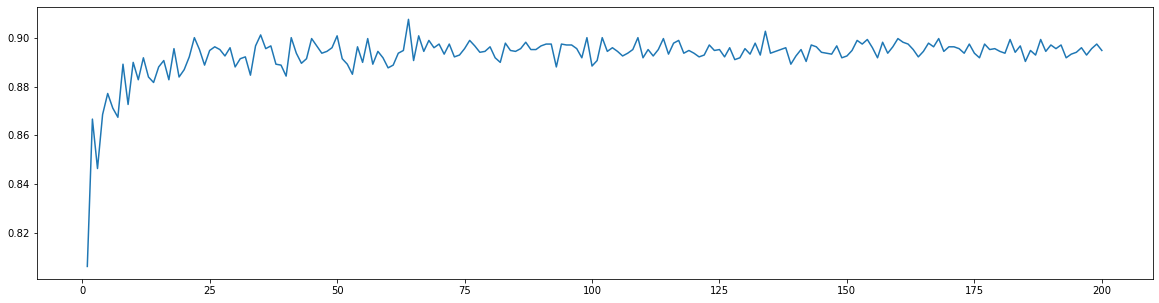

In [8]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc = rfc.fit(data_train,label_train)
    score = rfc.score(Xtest,Ytest)
    superpa.append(score)
print(max(superpa),superpa.index(max(superpa))+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

0.9000751314800901 33


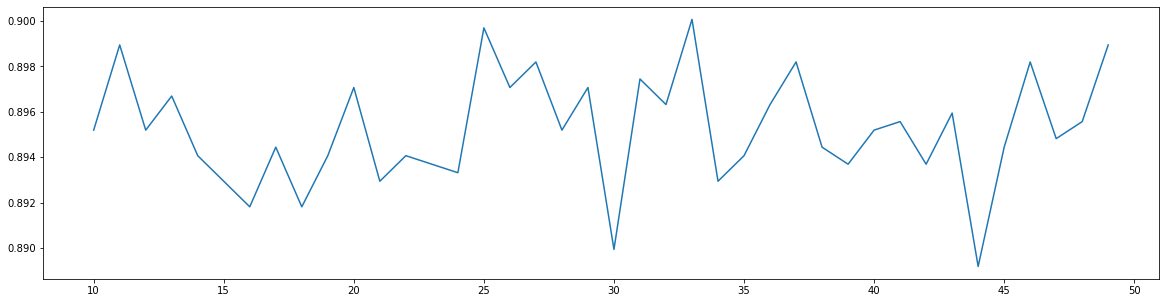

In [9]:
max_=[]
for i in range (10,50):
    rfc = RandomForestClassifier(n_estimators=64,oob_score=True,max_depth=i)
    rfc = rfc.fit(data_train,label_train)
    score = rfc.score(Xtest,Ytest)
    max_.append(score)
print(max(max_),max_.index(max(max_))+10)
plt.figure(figsize=[20,5])
plt.plot(range(10,50),max_)
plt.show()

In [10]:
rfc = RandomForestClassifier(n_estimators=114,oob_score=True,max_depth=26,random_state=0)
rfc = rfc.fit(data_train,label_train)
score = rfc.score(Xtest,Ytest)
print('acc=',score)
rfc.oob_score_

acc= 0.8951915852742299


0.9450934579439252

In [11]:
rfc = RandomForestClassifier(n_estimators=114,oob_score=True,max_depth=26,random_state=0,criterion='entropy')
rfc = rfc.fit(data_train,label_train)
score = rfc.score(Xtest,Ytest)
print('acc=',score)
rfc.oob_score_

acc= 0.8918106686701728


0.9439252336448598

In [12]:
data_train.extend(Xtest)
label_train.extend(Ytest)
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
score_pre = cross_val_score(rfc,data_train,label_train,cv=10).mean()

0.9502305574632063 141


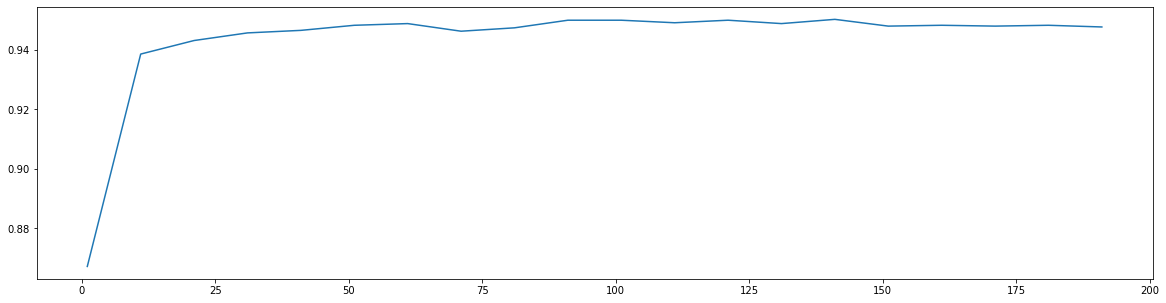

In [13]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,data_train,label_train,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()
#list.index([object])

In [ ]:
scorel = []
for i in range(135,145):
    rfc = RandomForestClassifier(
                                n_estimators=i,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,data_train,label_train,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(135,145)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

In [15]:
#调整max_depth
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':np.arange(1, 40, 1)}
rfc = RandomForestClassifier(n_estimators=141
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data_train,label_train)
print(GS.best_params_)
GS.best_score_

{'max_depth': 21}


0.9502558271745309

In [16]:
#调整max_features
param_grid = {'max_features':np.arange(4,20,1)}
rfc = RandomForestClassifier(n_estimators=141
                            ,random_state=90
                            ,max_depth=21
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data_train,label_train)
print(GS.best_params_)
GS.best_score_

{'max_features': 4}


0.9502558271745309

In [17]:
#调整min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
rfc = RandomForestClassifier(n_estimators=141
                            ,random_state=90
                            ,max_depth=21
                            ,max_features=4
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data_train,label_train)
print(GS.best_params_)
GS.best_score_

{'min_samples_leaf': 1}


0.9502558271745309

acc= 0.8948159278737791 P= 0.8684966397767693 R= 0.8427690466651123 F1= 0.8544400699912511


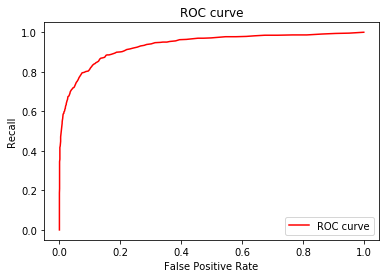

In [34]:
rfc = RandomForestClassifier(n_estimators=141
                        ,random_state=90
                        ,max_depth=21
                        ,max_features=4
                        )
Xtrain=[]
Ytrain=[]
data_train,label_train=load_data('Layer1-negative.txt',Xtrain,Ytrain)
data_train,label_train=load_data('Layer1-positive.txt',Xtrain,Ytrain)
for i in range(len(Xtrain)):
    Xtrain[i]=encode(Xtrain[i])
rfc = rfc.fit(Xtrain,Ytrain)
score = rfc.score(Xtest,Ytest)
y_pre = rfc.predict(Xtest)
precision_score = P(Ytest,y_pre,average='macro')
recall_score = R(Ytest,y_pre,average='macro')
F1_score = F1(Ytest,y_pre,average='macro')
print('P=',precision_score,'R=',recall_score,'F1=',F1_score)
FDR,RECALL,Thresholds = roc_curve(Ytest,rfc.predict_proba(Xtest)[:,1],pos_label=1)
plt.figure()
plt.plot(FDR,RECALL,color = 'red',
        label='ROC curve')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC curve')
plt.legend(loc = 'lower right')
plt.show()

In [33]:
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

scikit-learn version: 0.21.3
